## **Import thư viện các thư viện cần thiết:**

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
!gdown 1HJOSH99mhgR7OasSy6dg21e_iTFpyljy

Downloading...
From: https://drive.google.com/uc?id=1HJOSH99mhgR7OasSy6dg21e_iTFpyljy
To: /content/cleveland.csv
100% 10.9k/10.9k [00:00<00:00, 30.6MB/s]


## **Bài tập**

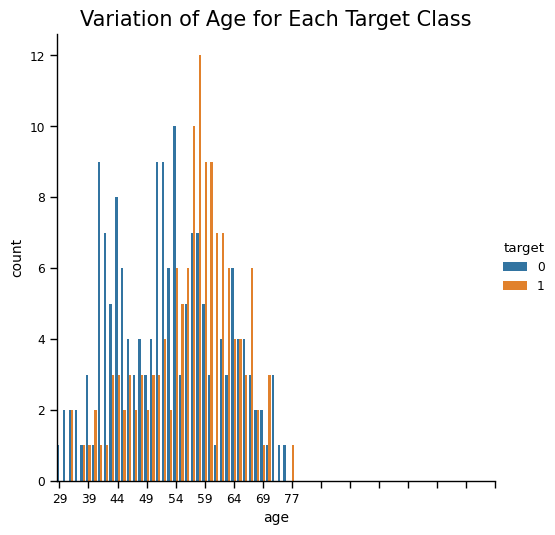

In [5]:
# Bài tập 1

# Load dataset
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
              'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Map target values
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Fill missing values
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

# Distribution of target vs age
sns.set_context("paper", font_scale=1, rc={"font.size": 3, "axes.titlesize": 15, "axes.labelsize": 10})
ax = sns.catplot(kind='count', data=df, x='age', hue='target',
                 order=df['age'].sort_values().unique())

# Set x-ticks
ax.ax.set_xticks(np.arange(0, 80, 5))
plt.title('Variation of Age for Each Target Class')
plt.show()


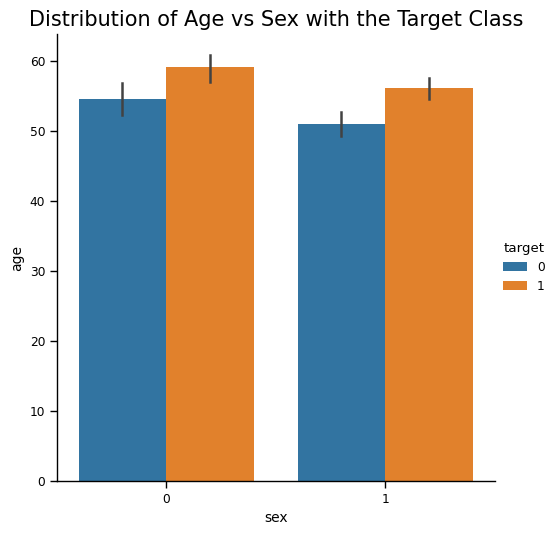

In [6]:
# Bài tập 2

# Barplot of age vs sex with hue = target
sns.catplot(kind='bar', data=df, y='age', x='sex', hue='target')
plt.title('Distribution of Age vs Sex with the Target Class')
plt.show()

In [10]:
#Bài tập 3

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.neighbors import KNeighborsClassifier
# Define the model
classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',
                                   leaf_size=30, p=2, metric="minkowski")

# Fit the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Confusion matrix for test set
cm_test = confusion_matrix(y_pred, y_test)

# Predicting the Train set results
y_pred_train = classifier.predict(X_train)

# Confusion matrix for train set
cm_train = confusion_matrix(y_pred_train, y_train)

# Calculate accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Print accuracies
print("Accuracy for training set for KNeighborsClassifier = {}".format(accuracy_for_train))
print("Accuracy for test set for KNeighborsClassifier = {}".format(accuracy_for_test))

Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


In [12]:
#Bài tập 4

from sklearn.svm import SVC
# Define the model
classifier = SVC(kernel='rbf', random_state=42)

# Fit the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Confusion matrix for test set
cm_test = confusion_matrix(y_pred, y_test)

# Predicting the Train set results
y_pred_train = classifier.predict(X_train)

# Confusion matrix for train set
cm_train = confusion_matrix(y_pred_train, y_train)

# Calculate accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Print accuracies
print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))


Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


In [13]:
#Bài tập 5

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.naive_bayes import GaussianNB
# Define the model
classifier = GaussianNB()

# Fit the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Confusion matrix for test set
cm_test = confusion_matrix(y_pred, y_test)

# Predicting the Train set results
y_pred_train = classifier.predict(X_train)

# Confusion matrix for train set
cm_train = confusion_matrix(y_pred_train, y_train)

# Calculate accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Print accuracies
print("Accuracy for training set for Naive Bayes = {}".format(accuracy_for_train))
print("Accuracy for test set for Naive Bayes = {}".format(accuracy_for_test))

Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


In [16]:
#Bài tập 6

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.tree import DecisionTreeClassifier
# Define the model
classifier = DecisionTreeClassifier(criterion='gini',
                                    max_depth = 10,
                                    min_samples_split=2,
                                    random_state=42)

# Fit the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Confusion matrix for test set
cm_test = confusion_matrix(y_pred, y_test)

# Predicting the Train set results
y_pred_train = classifier.predict(X_train)

# Confusion matrix for train set
cm_train = confusion_matrix(y_pred_train, y_train)

# Calculate accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Print accuracies
print("Accuracy for training set for Decision Tree = {}".format(accuracy_for_train))
print("Accuracy for test set for Decision Tree = {}".format(accuracy_for_test))

Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.75


In [17]:
#Bài tập 7

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import RandomForestClassifier
# Define the model
classifier = RandomForestClassifier(criterion='gini',
                                    max_depth = 10,
                                    min_samples_split=2,
                                    n_estimators=10,
                                    random_state=42)

# Fit the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Confusion matrix for test set
cm_test = confusion_matrix(y_pred, y_test)

# Predicting the Train set results
y_pred_train = classifier.predict(X_train)

# Confusion matrix for train set
cm_train = confusion_matrix(y_pred_train, y_train)

# Calculate accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Print accuracies
print("Accuracy for training set for Random Forest = {}".format(accuracy_for_train))
print("Accuracy for test set for Random Forest = {}".format(accuracy_for_test))

Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


In [19]:
#Bài tập 8

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import AdaBoostClassifier
# Define the model
classifier = AdaBoostClassifier(n_estimators=50,
                                learning_rate=1.0,
                                random_state=42)

# Fit the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Confusion matrix for test set
cm_test = confusion_matrix(y_pred, y_test)

# Predicting the Train set results
y_pred_train = classifier.predict(X_train)

# Confusion matrix for train set
cm_train = confusion_matrix(y_pred_train, y_train)

# Calculate accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Print accuracies
print("Accuracy for training set for Adaboost = {}".format(accuracy_for_train))
print("Accuracy for test set for Adaboost = {}".format(accuracy_for_test))

Accuracy for training set for Adaboost = 0.91
Accuracy for test set for Adaboost = 0.84


In [20]:
#Bài tập 9

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import GradientBoostingClassifier
# Define the model
classifier = GradientBoostingClassifier(learning_rate=0.1,
                                        n_estimators=100,
                                        subsample=1.0,
                                        min_samples_split=2,
                                        max_depth=3,
                                        random_state=42)

# Fit the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Confusion matrix for test set
cm_test = confusion_matrix(y_pred, y_test)

# Predicting the Train set results
y_pred_train = classifier.predict(X_train)

# Confusion matrix for train set
cm_train = confusion_matrix(y_pred_train, y_train)

# Calculate accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Print accuracies
print("Accuracy for training set for GradientBoost = {}".format(accuracy_for_train))
print("Accuracy for test set for GradientBoost = {}".format(accuracy_for_test))

Accuracy for training set for GradientBoost = 1.0
Accuracy for test set for GradientBoost = 0.85


In [23]:
#Bài tập 10

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from xgboost import XGBClassifier
# Define the model
xg = XGBClassifier(objective="binary:logistic",
                   random_state=42,
                   n_estimators = 100)
# Fit the model
xg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = xg.predict(X_test)

# Confusion matrix for test set
cm_test = confusion_matrix(y_pred, y_test)

# Predicting the Train set results
y_pred_train = xg.predict(X_train)

# Confusion matrix for train set
cm_train = confusion_matrix(y_pred_train, y_train)

# Calculate accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Print accuracies
print("Accuracy for training set for XGboost = {}".format(accuracy_for_train))
print("Accuracy for test set for XGboost = {}".format(accuracy_for_test))

Accuracy for training set for XGboost = 1.0
Accuracy for test set for XGboost = 0.87


In [32]:
#Bài tập 11

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

dtc =  DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn =  KNeighborsClassifier()
xgb = XGBClassifier()
gc = GradientBoostingClassifier(random_state=42)
svm = SVC(kernel = 'rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

clf = [('dtc',dtc), ('rfc',rfc), ('gc',gc), ('ad',ad), ('knn',knn), ('svc',svm)]

from sklearn.ensemble import StackingClassifier
# Define the model
xg = XGBClassifier()
classifier = StackingClassifier(estimators=clf, final_estimator=xg)
# Fit the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Confusion matrix for test set
cm_test = confusion_matrix(y_pred, y_test)

# Predicting the Train set results
y_pred_train = classifier.predict(X_train)

# Confusion matrix for train set
cm_train = confusion_matrix(y_pred_train, y_train)

# Calculate accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Print accuracies
print("Accuracy for training set for Stacking = {}".format(accuracy_for_train))
print("Accuracy for test set for Stacking = {}".format(accuracy_for_test))

Accuracy for training set for Stacking = 0.92
Accuracy for test set for Stacking = 0.89
